Reference: https://qiita.com/everylittle/items/ba821e93d275a421ca2b  
  
RNN(LSTM) を試す、列の総和を出力するモデル  
固定長の場合

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Masking, LSTM
#from keras.layers.recurrent import LSTM
from tensorflow.keras.optimizers import Adam
import numpy as np
import random

In [2]:
input_dim = 1                # 入力データの次元数：実数値1個なので1を指定
output_dim = 1               # 出力データの次元数：同上
num_hidden_units = 128       # 隠れ層のユニット数
len_sequence = 10            # 時系列の長さ
batch_size = 300             # ミニバッチサイズ
num_of_training_epochs = 100 # 学習エポック数
learning_rate = 0.001        # 学習率
num_training_samples = 1000  # 学習データのサンプル数

In [3]:
def create_data(nb_of_samples, sequence_len):
    # 乱数で {0.0, 1.0} の列を指定された個数だけ生成する
    X = np.random.randint(0, 2, (nb_of_samples, sequence_len)).astype("float32")
    
    # 各行の総和を正解ラベルとする
    t = np.sum(X, axis=1)
    
    # LSTMに与える入力は (サンプル, 時刻, 特徴量の次元) の3次元になる。
    return X.reshape((nb_of_samples, sequence_len, 1)), t

In [4]:
random.seed(0)
np.random.seed(0)
#tf.set_random_seed(0)
tf.random.set_seed(0)

In [5]:
X, t = create_data(num_training_samples, len_sequence)

In [6]:
print(X.shape)
print(t.shape)

(1000, 10, 1)
(1000,)


In [7]:
X[10]

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [8]:
t[10]

4.0

In [9]:
#X.reshape(X.shape[:-1])

import pandas as pd
df = pd.DataFrame(X.reshape(X.shape[:-1]))
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [10]:
df2 = pd.concat([df, pd.Series(t, name='t')], axis=1)
df2.tail()

,0,1,2,3,4,5,6,7,8,9,t
995,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,7.0
996,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,6.0
997,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0
998,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,7.0
999,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, t_train, t_val = train_test_split(X, t, train_size=0.7, random_state=0)

In [21]:
print(X_train.shape, t_train.shape)
print(X_val.shape, t_val.shape)

(700, 10, 1) (700,)
(300, 10, 1) (300,)


In [32]:
lstm = LSTM(num_hidden_units, input_shape=(len_sequence, input_dim), return_sequences=False)

model = Sequential()

model.add(lstm)
model.add(Dense(output_dim))

model.compile(loss="mean_squared_error", optimizer=Adam(lr=learning_rate))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [33]:
# model.fit(X,
#           t,
#           batch_size=batch_size,
#           epochs=num_of_training_epochs,
#           validation_split=0.1)

# hist = model.fit(X_train,
#                  t_train,
#                  batch_size=batch_size,
#                  epochs=num_of_training_epochs,
#                  validation_split=0.1)
hist = model.fit(X_train,
                 t_train,
                 batch_size=batch_size,
                 epochs=num_of_training_epochs,
                 validation_data=(X_val, t_val))

Epoch 1/100
3/3 [==============================] - 0s 109ms/step - loss: 28.4660 - val_loss: 25.7327
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 26.6322 - val_loss: 23.8581
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 24.5694 - val_loss: 21.4701
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 21.8270 - val_loss: 17.8755
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 17.5319 - val_loss: 11.7643
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 10.4554 - val_loss: 3.1949
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 2.2888 - val_loss: 2.1783
Epoch 8/100
3/3 [==============================] - 0s 19ms/step - loss: 3.1273 - val_loss: 4.7649
Epoch 9/100
3/3 [==============================] - 0s 21ms/step - loss: 4.1014 - val_loss: 2.4370
Epoch 10/100
3/3 [==============================] - 0s 19ms/step - loss: 1.9175 - val_loss: 1.0323
Epoch 1

3/3 [==============================] - 0s 21ms/step - loss: 0.0923 - val_loss: 0.0964
Epoch 84/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0917 - val_loss: 0.0941
Epoch 85/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0928 - val_loss: 0.0862
Epoch 86/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0850 - val_loss: 0.0754
Epoch 87/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0825 - val_loss: 0.0748
Epoch 88/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0829 - val_loss: 0.0941
Epoch 89/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0884 - val_loss: 0.0751
Epoch 90/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0786 - val_loss: 0.0666
Epoch 91/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0733 - val_loss: 0.0689
Epoch 92/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0716 - val_loss: 0.0727
Epoch 93/100
3/3 [=====

In [35]:
test = np.array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1]).astype("float32").reshape((1, 10, 1))

print(model.predict(test)) # [[7.7854743]]

[[7.8963113]]


<AxesSubplot:>

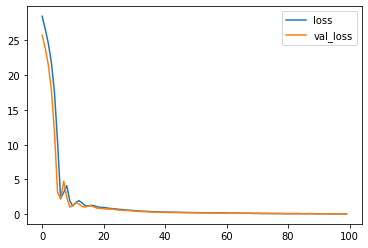

In [34]:
import pandas as pd

results = pd.DataFrame(hist.history)
results[['loss', 'val_loss']].plot()